# Import & setup

In [172]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import calendar
from datetime import datetime
pd.set_option('display.max_columns', None)

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [173]:
from google.colab import drive
drive.mount('/content/gdrive')

# directory
%cd '/content/gdrive/My Drive/Oxford/ML_for_Social_Good'

# import
df = pd.read_csv("cleaned_fulldf.csv")
print(df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Oxford/ML_for_Social_Good
(5160, 80)


In [174]:
# Selecting variables indicated by Shaw -- left out date variables for now

# to add: FirstTopDressFert, CropbasalFerts, OrgFertilizers
cdf = df[["ID","CropTillageDepth","CropEstMethod","SeedlingsPerPit","TransplantingIrrigationHours","TransplantingIrrigationSource",
          # one-hot encoded LandPrepMethod
          'LandPrepMethod_TractorPlough','LandPrepMethod_FourWheelTracRotavator','LandPrepMethod_WetTillagePuddling', 'LandPrepMethod_BullockPlough','LandPrepMethod_Other',
          # one-hot encoded CropbasalFerts
          'CropbasalFerts_Urea','CropbasalFerts_DAP', 'CropbasalFerts_Other', 'CropbasalFerts_NPK','CropbasalFerts_MoP', 'CropbasalFerts_NPKS', 'CropbasalFerts_SSP',
          'CropbasalFerts_None',
          # one-hot encoded FirstTopDressFert
          'FirstTopDressFert_Urea','FirstTopDressFert_DAP', 'FirstTopDressFert_NPK','FirstTopDressFert_NPKS', 'FirstTopDressFert_SSP','FirstTopDressFert_Other',
          # one-hot encoded OrgFertilizers
          'OrgFertilizers_Ganaura','OrgFertilizers_FYM', 'OrgFertilizers_VermiCompost','OrgFertilizers_Pranamrit', 'OrgFertilizers_Ghanajeevamrit','OrgFertilizers_Jeevamrit',
          'OrgFertilizers_PoultryManure',
          #--
          "Ganaura_per_Acre","CropOrgFYM_per_Acre","PCropSolidOrgFertAppMethod","NoFertilizerAppln","MineralFertAppMethod","MineralFertAppMethod.1",
          "Harv_method","Threshing_method",#"Yield_per_Acre"
        ]]

cdf.head()

,ID,CropTillageDepth,CropEstMethod,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Ganaura_per_Acre,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,MineralFertAppMethod,MineralFertAppMethod.1,Harv_method,Threshing_method
0,ID_GTFAC7PEVWQ9,5,Manual_PuddledRandom,2.0,5.0,Boring,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,2,Broadcasting,Broadcasting,machine,machine
1,ID_TK40ARLSPOKS,5,Manual_PuddledRandom,2.0,5.0,Boring,True,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,2,Broadcasting,Broadcasting,hand,machine
2,ID_1FJY2CRIMLZZ,6,Manual_PuddledRandom,2.0,4.0,Boring,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,6.75,6.75,SoilApplied,2,SoilApplied,RootApplication,hand,machine
3,ID_I3IPXS4DB7NE,6,Manual_PuddledRandom,2.0,NaN,NaN,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,4.50,NaN,SoilApplied,2,Broadcasting,Broadcasting,hand,hand
4,ID_4T8YQWXWHB4A,4,Manual_PuddledRandom,2.0,9.0,Boring,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,2,Broadcasting,Broadcasting,machine,machine


In [175]:
cdf.columns

Index(['ID', 'CropTillageDepth', 'CropEstMethod', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'LandPrepMethod_TractorPlough', 'LandPrepMethod_FourWheelTracRotavator',
       'LandPrepMethod_WetTillagePuddling', 'LandPrepMethod_BullockPlough',
       'LandPrepMethod_Other', 'CropbasalFerts_Urea', 'CropbasalFerts_DAP',
       'CropbasalFerts_Other', 'CropbasalFerts_NPK', 'CropbasalFerts_MoP',
       'CropbasalFerts_NPKS', 'CropbasalFerts_SSP', 'CropbasalFerts_None',
       'FirstTopDressFert_Urea', 'FirstTopDressFert_DAP',
       'FirstTopDressFert_NPK', 'FirstTopDressFert_NPKS',
       'FirstTopDressFert_SSP', 'FirstTopDressFert_Other',
       'OrgFertilizers_Ganaura', 'OrgFertilizers_FYM',
       'OrgFertilizers_VermiCompost', 'OrgFertilizers_Pranamrit',
       'OrgFertilizers_Ghanajeevamrit', 'OrgFertilizers_Jeevamrit',
       'OrgFertilizers_PoultryManure', 'Ganaura_per_Acre',
       'CropOrgFYM_per_Acre', 'PCropSolidOrgFertAppMet

# Pre-processing

In [176]:
# 1. CATEGORICAL VARIABLES

# Binary variables
cdf["Harv_method"] = cdf["Harv_method"].replace({"hand":0, "machine":1})
cdf["Threshing_method"] = cdf["Threshing_method"].replace({"hand":0, "machine":1})

# Dummies
dummy_cols = ["CropEstMethod","TransplantingIrrigationSource","PCropSolidOrgFertAppMethod","MineralFertAppMethod","MineralFertAppMethod.1"]
cdf = pd.get_dummies(cdf, columns=dummy_cols)

# Bool -> int
bools = cdf.select_dtypes(include='bool').columns
cdf[bools] = cdf[bools].astype(int)

In [177]:
# 2. MISSING DATA

# Ganaura_per_Acre & CropOrgFYM_per_Acre -> replacing with 0
cdf["Ganaura_per_Acre"] = cdf["Ganaura_per_Acre"].fillna(0)
cdf["CropOrgFYM_per_Acre"] = cdf["CropOrgFYM_per_Acre"].fillna(0)

# SeedlingsPerPit -> replacing by median (=2)
cdf["SeedlingsPerPit"] = cdf["SeedlingsPerPit"].fillna(cdf.SeedlingsPerPit.median())

# TransplantingIrrigationHours -> replacing by median (=4)
cdf["TransplantingIrrigationHours"] = cdf["TransplantingIrrigationHours"].fillna(cdf.TransplantingIrrigationHours.median())

In [178]:
# 3. NUMERICAL VARIABLES

num_cols = ["CropTillageDepth","SeedlingsPerPit","TransplantingIrrigationHours","NoFertilizerAppln","CropOrgFYM_per_Acre","Ganaura_per_Acre"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cdf[num_cols])

# Normalizing
cdf[num_cols] = normalize(X_scaled)

In [179]:
cdf = cdf.drop(columns=["ID"])

# PCA

In [180]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(cdf)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [181]:
X_principal

,P1,P2
0,-0.373510,-0.701001
1,-0.371160,-1.081018
2,1.064097,-1.034791
3,0.398502,-0.765359
4,-0.980957,-0.161784
...,...,...
5155,1.296501,0.935804
5156,0.708836,-1.160615
5157,1.854395,0.163620
5158,0.039170,1.644295


# Spectral clustering

### Test 1

#### RBF affinity

In [182]:
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

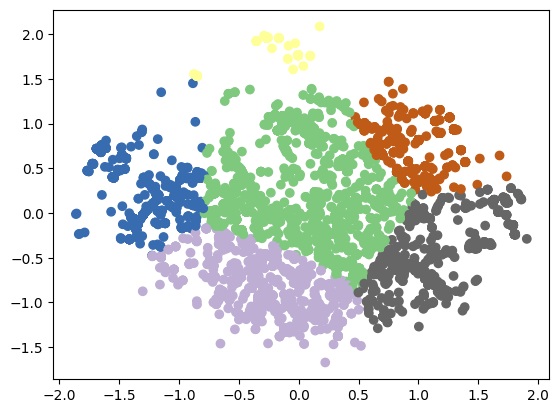

In [183]:
# Visualizing
import matplotlib.pyplot as plt

plt.scatter(X_principal['P1'], X_principal['P2'],
           c = SpectralClustering(n_clusters = 6, affinity ='rbf') .fit_predict(X_principal), cmap="Accent")
plt.show()

#### Nearest neighbor affinity

In [184]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(X_principal)

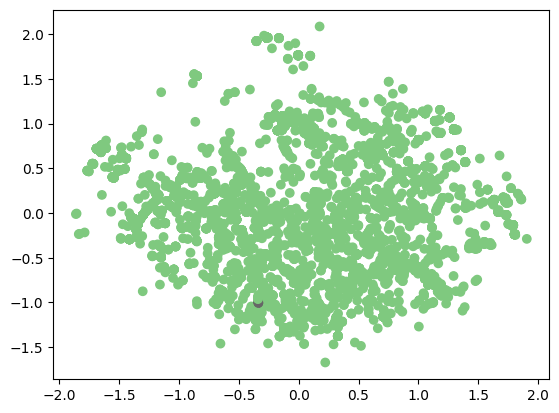

In [185]:
# Visualizing
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap="Accent")
plt.show()

#### Comparing silhouette scores

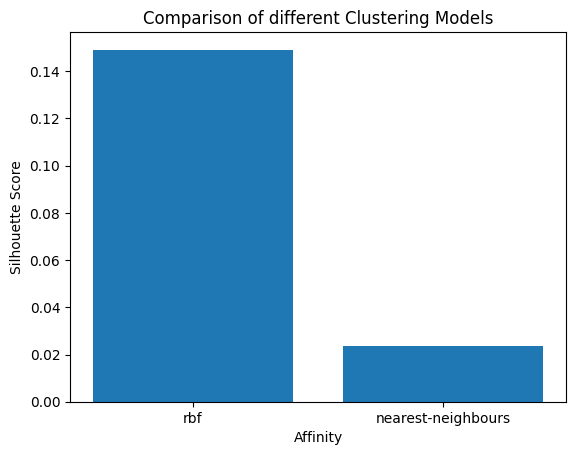

[0.14913248307752028, 0.02381281560700277]


In [186]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores = []

# Evaluating the performance
s_scores.append(silhouette_score(cdf, labels_rbf))
s_scores.append(silhouette_score(cdf, labels_nn))

# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

print(s_scores)

### Test 2

In [187]:
cdf

,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Ganaura_per_Acre,CropOrgFYM_per_Acre,NoFertilizerAppln,Harv_method,Threshing_method,CropEstMethod_Broadcasting,CropEstMethod_LineSowingAfterTillage,CropEstMethod_Manual_PuddledLine,CropEstMethod_Manual_PuddledRandom,TransplantingIrrigationSource_Boring,TransplantingIrrigationSource_Canal,TransplantingIrrigationSource_Pond,TransplantingIrrigationSource_Rainfed,TransplantingIrrigationSource_TubeWell,TransplantingIrrigationSource_Well,PCropSolidOrgFertAppMethod_Broadcasting,PCropSolidOrgFertAppMethod_RootApplication,PCropSolidOrgFertAppMethod_SoilApplied,PCropSolidOrgFertAppMethod_Spray,MineralFertAppMethod_Broadcasting,MineralFertAppMethod_RootApplication,MineralFertAppMethod_SoilApplied,MineralFertAppMethod_Spray,MineralFertAppMethod.1_Broadcasting,MineralFertAppMethod.1_RootApplication,MineralFertAppMethod.1_SoilApplied
0,0.711699,-0.420705,-0.110337,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.220459,-0.199337,-0.464736,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.711699,-0.420705,-0.110337,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.220459,-0.199337,-0.464736,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.948630,-0.193096,-0.068190,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,-0.088386,-0.069675,-0.213305,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0.946602,-0.192683,-0.068044,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,-0.092455,-0.091296,-0.212849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,-0.679313,-0.444176,0.044964,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.232758,-0.210458,-0.490663,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,-0.267604,-0.495144,-0.077692,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.091691,-0.065333,0.815174,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
5156,0.235516,-0.139220,-0.074467,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.072955,-0.001881,-0.956179,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5157,0.654872,-0.377213,-0.071301,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.069853,0.182278,0.621019,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
5158,-0.270774,0.470874,-0.094701,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.092777,-0.083888,0.824831,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [188]:
spectral = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0,n_init=200).fit(cdf)

cdf_results = cdf.copy()
cdf_results['spectral_k2_label'] = spectral.labels_
cdf_results['spectral_k2_label'].value_counts()

0    4910
1     250
Name: spectral_k2_label, dtype: int64

In [189]:
def run_spectral(k_range, input_df, output_df):
  for k in k_range:
    spectral = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=0, n_init=200).fit(input_df)
    colname = 'k' + str(k) + "label"
    col_list.append(colname)
    output_df[colname] = spectral.labels_

In [190]:
col_list = []
k_range = range(2,6)

run_spectral(k_range, cdf, cdf_results)

In [191]:
print(cdf_results["k2label"].value_counts())
print(cdf_results["k3label"].value_counts())
print(cdf_results["k4label"].value_counts())
print(cdf_results["k5label"].value_counts())

0    4910
1     250
Name: k2label, dtype: int64
0    3907
1    1004
2     249
Name: k3label, dtype: int64
0    3837
1     987
2     249
3      87
Name: k4label, dtype: int64
0    2383
2    2085
1     356
3     249
4      87
Name: k5label, dtype: int64


In [192]:
cdf_results["k2label"] = cdf_results["k2label"].replace({0:"A", 1:"B"})
cdf_results["k3label"] = cdf_results["k3label"].replace({0:"A", 1:"B", 2:"C"})
cdf_results["k4label"] = cdf_results["k4label"].replace({0:"A", 1:"B", 2:"C", 3:"D"})
cdf_results["k5label"] = cdf_results["k5label"].replace({0:"A", 2:"B", 1:"C", 3:"D", 4:"E"})

In [193]:
cdf_results.loc[cdf_results["k5label"]=="A"].k2label.value_counts()

A    2382
B       1
Name: k2label, dtype: int64

In [194]:
# --------------------------------

In [195]:
# Running on the PCA version to compare

col_list = []
k_range = range(2,7)
X_results = X_principal.copy()

run_spectral(k_range, X_principal, X_results)

In [196]:
print(X_results["k2label"].value_counts())
print(X_results["k3label"].value_counts())
print(X_results["k4label"].value_counts())
print(X_results["k5label"].value_counts())
print(X_results["k6label"].value_counts())

1    2766
0    2394
Name: k2label, dtype: int64
0    2086
2    1622
1    1452
Name: k3label, dtype: int64
3    2044
1    1387
0    1314
2     415
Name: k4label, dtype: int64
1    1588
4    1193
0    1059
3    1031
2     289
Name: k5label, dtype: int64
2    1202
5    1021
0     978
1     968
4     741
3     250
Name: k6label, dtype: int64


In [197]:
# ------------------------------

In [198]:
tempo = cdf_results[["k2label","k3label","k4label","k5label"]]
df2 = pd.concat([df,tempo], axis=1)
tempo.shape, df.shape, df2.shape

((5160, 4), (5160, 80), (5160, 84))

In [199]:
df2.loc[df2["k2label"]=="B"].CropTillageDepth.value_counts()

4    250
Name: CropTillageDepth, dtype: int64

In [200]:
fig = px.box(df2, x="CropTillageDepth", color="k3label", width=600, height=400)
fig.show()

fig = px.box(df2, x="SeedlingsPerPit", color="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df2, x="TransplantingIrrigationSource", color="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df2, x="OrgFertilizers", color="k3label", width=600, height=400)
fig.show()

fig = px.box(df2, x="CropOrgFYM_per_Acre", color="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df2, x="Harv_method", facet_col="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df2, x="Threshing_method", facet_col="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df2, x="District", facet_col="k3label", width=800, height=400)
fig.show()

fig = px.histogram(df2, x="Block", facet_col="k3label", width=900, height=400)
fig.show()